K means clustering is an unsupervised machine learning algorithm that groups data into a defined number of clusters.  Data clusters are determined by the data points' proximity or euclidean distance from a cluster centroid.

The aim is to reduce the euclidean distance between each point and a cluster centroid, which is iteratively calulated as the average position of all the points in a cluster.  In other words, we calculate a centroid as the average position of all data in a cluster in one iteration, then re-cluster all the data based on their nearest proximity to a cluster in the following iteration.  We continue this algorithm until the clusters stop chaging.

The parameter we adjust to tune this algorithm is K, which is the number of clusters we expect the data to be broken into.  This can be a limitation for this algorithm if the number of clusters is unknown.

In [139]:
from copy import deepcopy
import random
from operator import itemgetter

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

In [140]:
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]]
X, _ = make_blobs(
    n_samples=500, centers=centers, cluster_std=0.4, random_state=0
)

data = list(zip(X[:,0], X[:,1]))

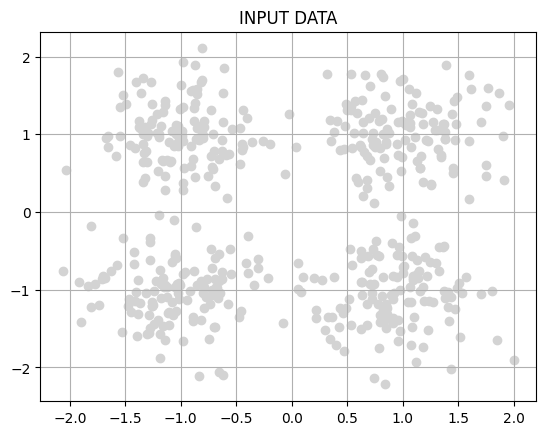

In [141]:
fig0, ax0 = plt.subplots()

ax0.scatter(
    x = list(map(itemgetter(0), data)),
    y = list(map(itemgetter(1), data)),
    c='lightgrey')
ax0.grid(True)
ax0.set_title('INPUT DATA')

plt.show()

In [142]:
#  linear distance between 2 points
def get_equclidean_distance(pt1, pt2):
    dist = np.sqrt(
        (pt2[0]-pt1[0])**2+(pt2[1]-pt1[1])**2
        )
    
    return dist

In [143]:
#  get the average coordinate of a set of coordinates
def average_of_coordinates(coords=[]):
    #  'coords' is a list of tuples, where each tuple is a point's coordinate

    x = list(map(itemgetter(0), coords))
    y = list(map(itemgetter(-1), coords))

    x_mean = float(np.mean(x))
    y_mean = float(np.mean(y))

    return (x_mean, y_mean)

Define how many clusters, K, we want.

In [144]:
K = 4

Deep copy data into a variable to retain original data set

In [145]:
pop_data = deepcopy(data)

Randomly select centroids from the data to begin calculating data distances and assign preliminary clusters.

In [146]:
start_cluster_centroids = []
for i in range(K):
    pop_idx = random.randrange(len(pop_data))
    start_centroid = pop_data.pop(pop_idx)

    start_cluster_centroids.append(start_centroid)

Assign data to clusters based on the centroids they're closest to.

In [147]:
def get_clusters(cluster_centroids, data):

    clusters = {key:[] for key in cluster_centroids}
    for data_val in data:


        centroid_distances=dict()
        for centroid in clusters.keys():

            distance = get_equclidean_distance(pt1=centroid, pt2=data_val)
            centroid_distances[centroid]=distance


        min_distance = min(centroid_distances.values())
        for centroid_key, distance_val in centroid_distances.items():
            if distance_val == min_distance:
                clusters[centroid_key].append(data_val)

    return clusters

In [148]:
clusters = get_clusters(cluster_centroids=start_cluster_centroids, data=data)

Calculate the variance in the clustered data to measure the dispersion of the data points from the mean.  Lower variance indicates that the data points are generally similar and do not vary widely from the mean.  Conversely, higher variance indicates that the values vary more widely from the mean.

* Variance can also be called the 'cluster interia'.

* variance = sum((data_values_in_cluster - centroid)^2) / number_of_values_in_cluster

* I use the euclidean distance between the 2 points to calculate the variance since the data is 2 dimensional.

In [149]:
#  AKA cluster inertia
def get_cluster_variances(clusters):

    cluster_variances = dict()
    for centroid_key, cluster_vals in clusters.items():

        diff_sq = [(get_equclidean_distance(pt1=val, pt2=centroid_key))**2 for val in cluster_vals]
        variance = sum(diff_sq)/(len(cluster_vals))

        cluster_variances[centroid_key]=float(variance)

    return cluster_variances

In [150]:
cluster_variance = get_cluster_variances(clusters=clusters)

Once all the data is grouped into their clusters, calculate the average of the data within each cluster.  

In [151]:
def update_centroids(clusters):

    new_centroids = []
    for centroid_key, cluster_vals in clusters.items():
        cluster_avg = average_of_coordinates(coords=cluster_vals)

        new_centroids.append(cluster_avg)

    return new_centroids

In [152]:
new_centroids = update_centroids(clusters=clusters)

These averages are the new centroids around which the data will be clustered.  This process is iterated until the centroids are no longer changing significantly.

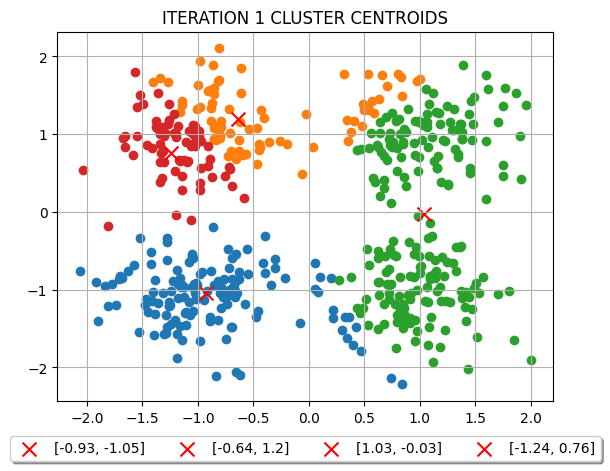

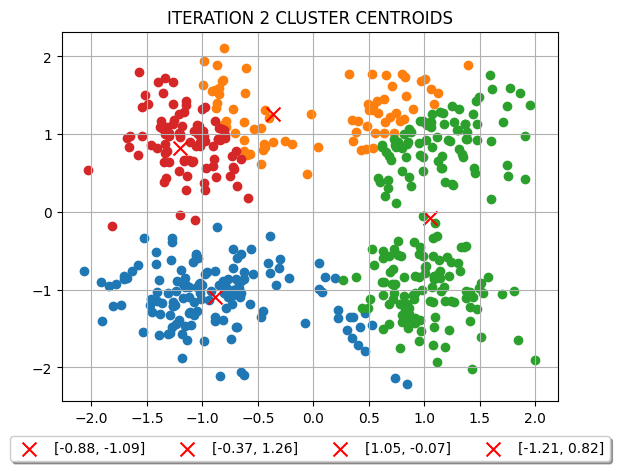

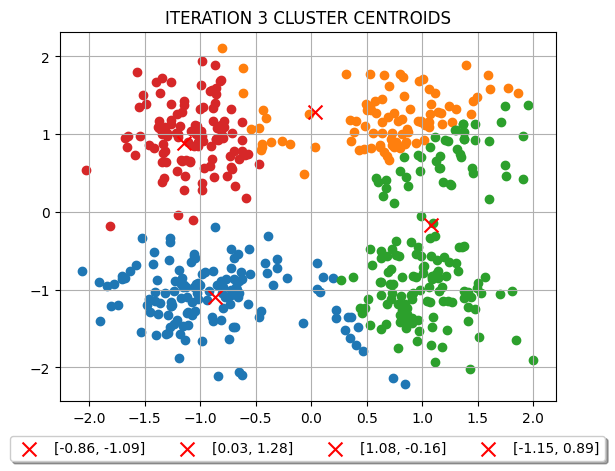

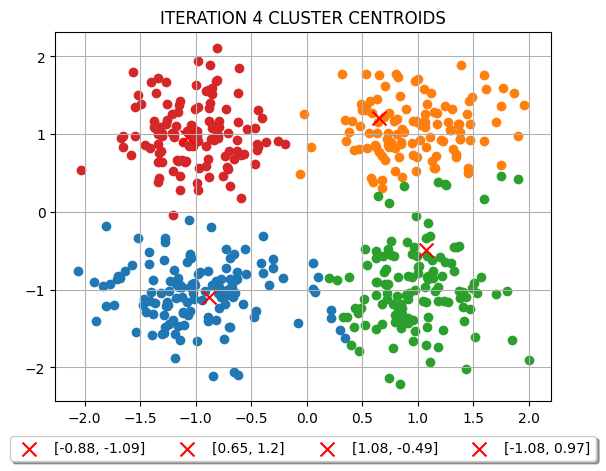

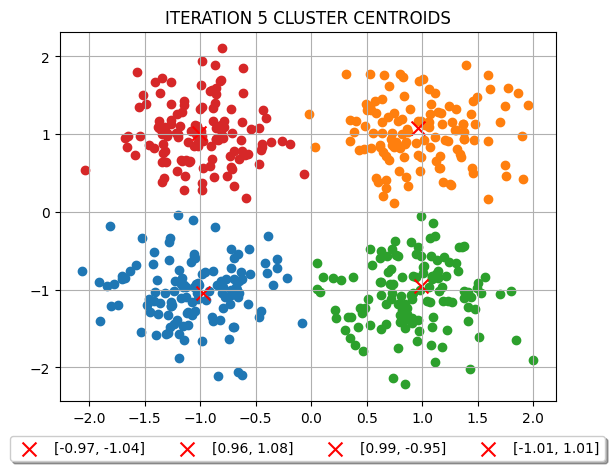

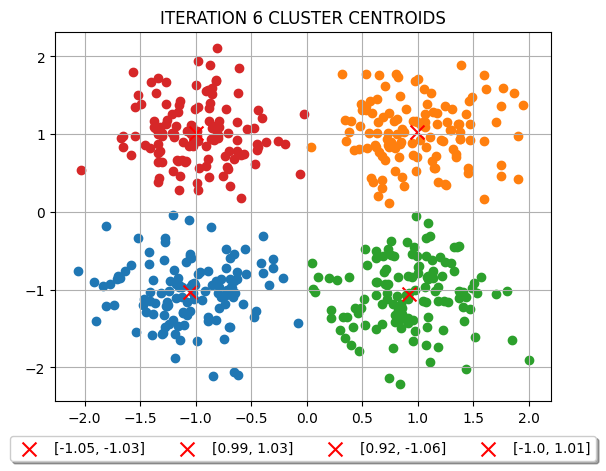

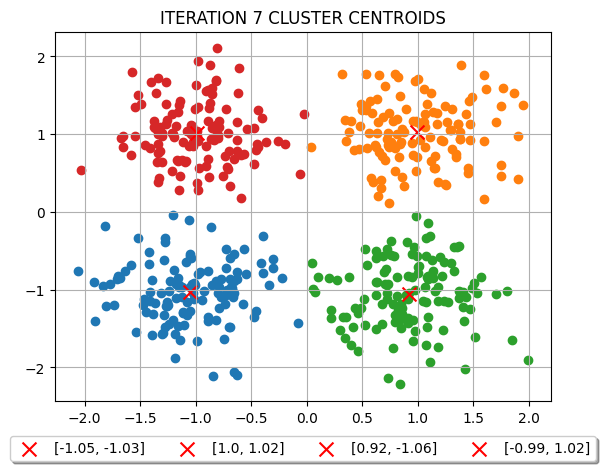

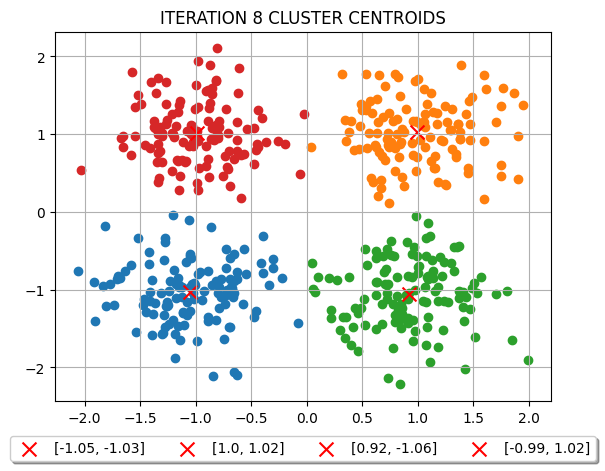

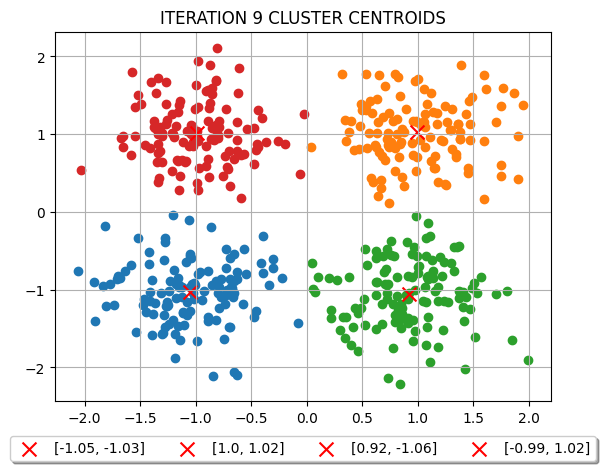

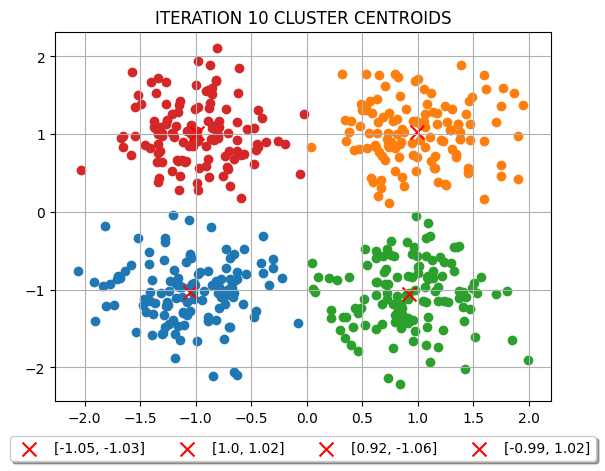

In [153]:
for i in range(10):

    clusters = get_clusters(cluster_centroids=new_centroids, data=data)
    cluster_variance = get_cluster_variances(clusters=clusters)
    new_centroids = update_centroids(clusters=clusters)



    fig1, ax1 = plt.subplots()
    for centroid_key, cluster_vals in clusters.items():
        
        ax1.scatter(
            list(map(itemgetter(0), cluster_vals)), 
            list(map(itemgetter(1), cluster_vals))
            )
        
        legend_label = [round(centroid, 2) for centroid in centroid_key]
        
        ax1.scatter(
            centroid_key[0],
            centroid_key[1],
            label=legend_label,
            s=100, 
            marker='x',
            c='red'
            )
        

        #  legend box
        box = ax1.get_position()
        ax1.set_position([box.x0, box.y0 + box.height * 0.01,
                        box.width, box.height * 1])

        # Put a legend below current axis
        ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.075),
          fancybox=True, shadow=True, ncol=5)
        

        ax1.set_title(f'ITERATION {i+1} CLUSTER CENTROIDS')
        ax1.grid(True)

    plt.show()

-----

The sum of cluster variances (AKA inertia) can be used to identify the optimal number of clusters for a given data set.  Iterate through the KMeans algorithm using a reasonable number of clusters, K.  In this example, we run the KMeans algorithm for K=1 through K=10 clusters.

We calculate the sum of cluster variances for each defined cluster count, K, and plot the vairance sums to identify the optimal number of clusters.

When the variance-clusters plot is generated, the optimal number of clusters can be identified at the 'elbow' of the plot.

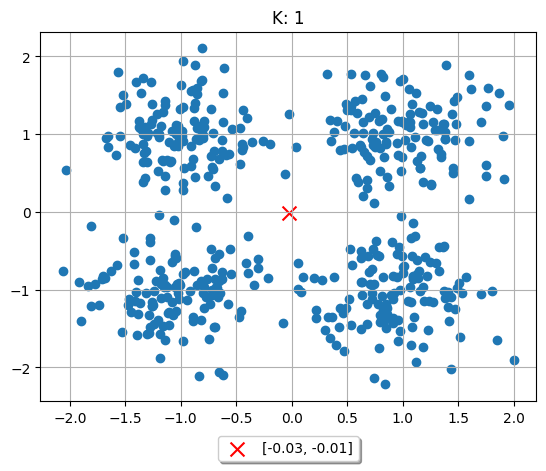

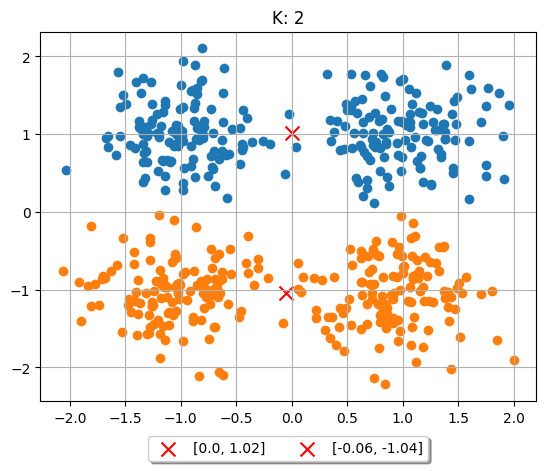

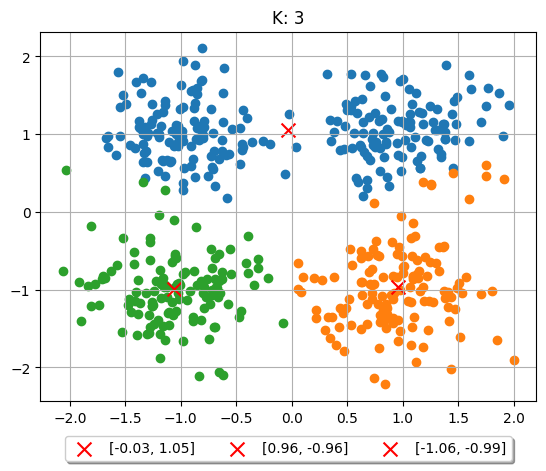

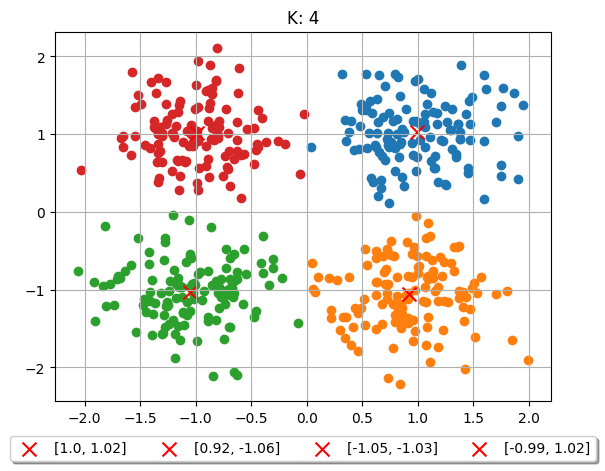

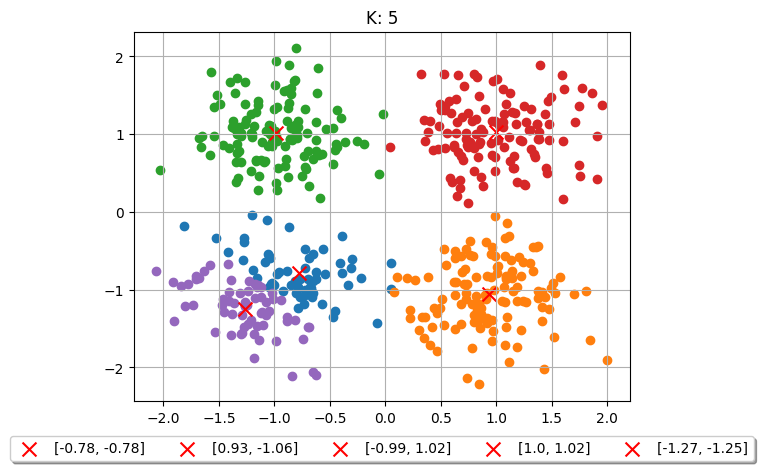

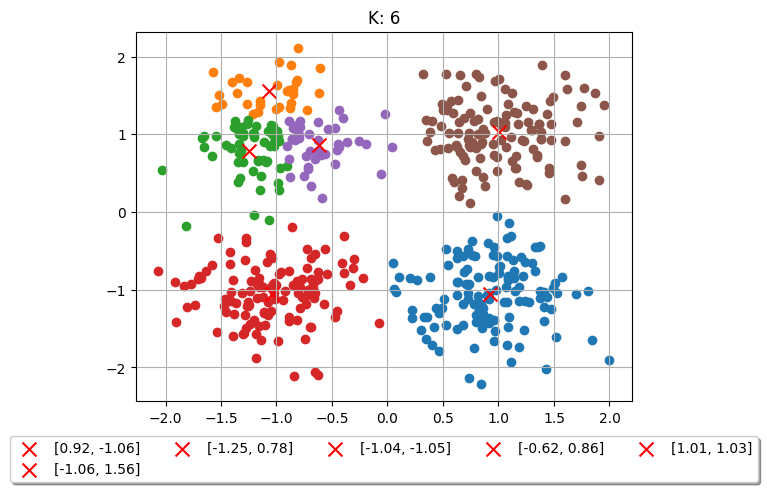

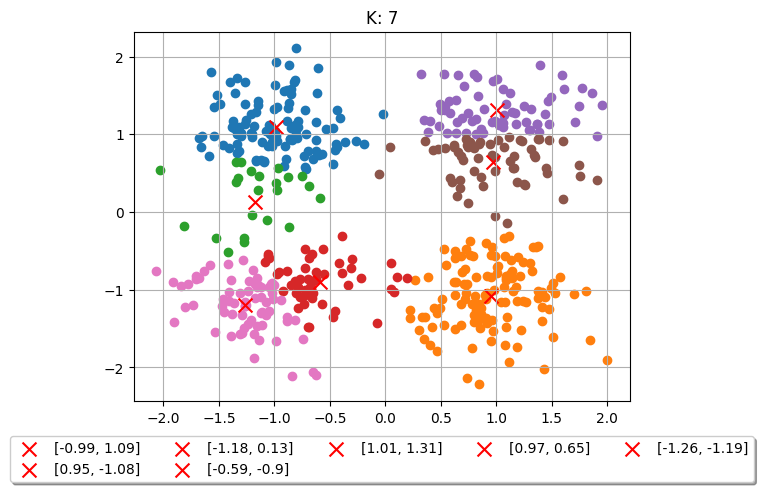

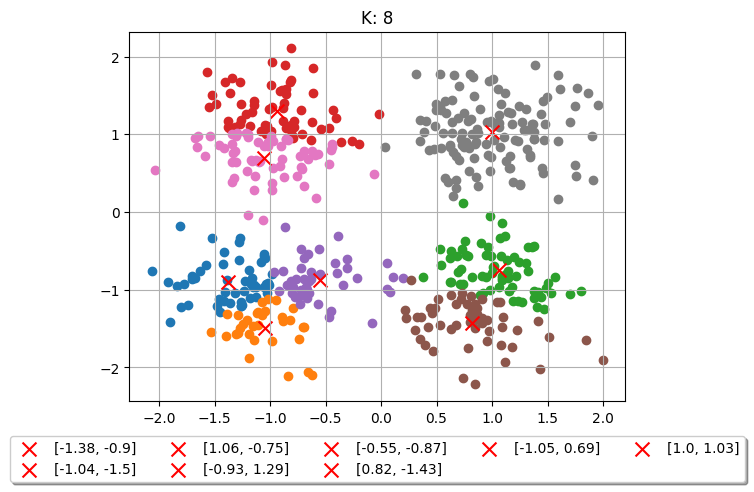

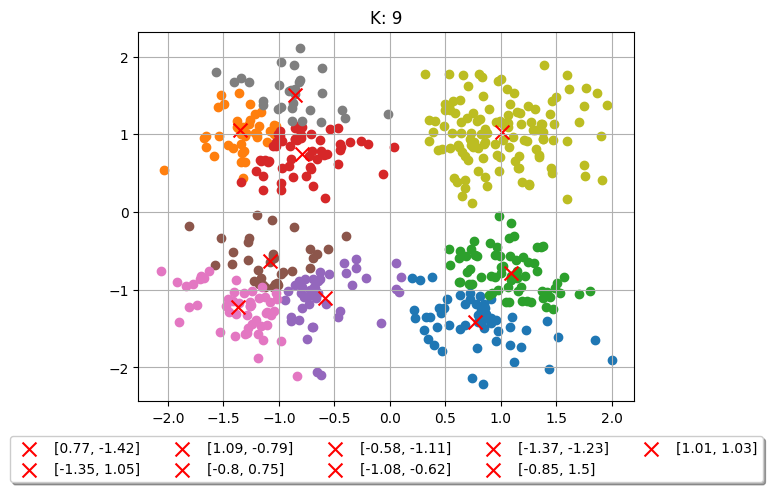

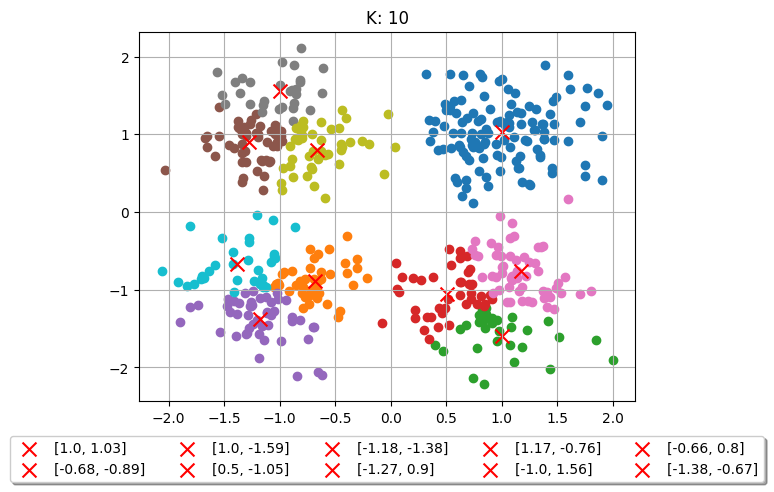

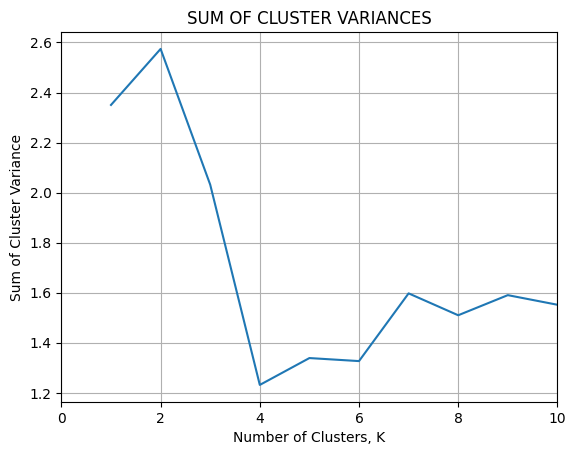

In [154]:
#  define how up to how many clusters we want to test
K_max=10


sum_variance = []  # this variable is going to store the sum of cluster variance across all cluster counts, K
for K in range(1, K_max+1):

    pop_data = deepcopy(data)
    start_cluster_centroids = [pop_data.pop(random.randrange(len(pop_data))) for i in range(K)]

    clusters = get_clusters(cluster_centroids=start_cluster_centroids, data=data)
    cluster_variance = get_cluster_variances(clusters=clusters)
    new_centroids = update_centroids(clusters=clusters)


    #  define how many times we want the algorithm to calculate cluster centroids and converge data to a cluster
    for cluster_iteration in range(10):
        
        clusters = get_clusters(cluster_centroids=new_centroids, data=data)
        cluster_variance = get_cluster_variances(clusters=clusters)
        new_centroids = update_centroids(clusters=clusters)


    #  store the sum of cluster variance across all cluster counts, K
    sum_variance.append((K, sum(cluster_variance.values())))


    #  plot clustered data
    fig1, ax1 = plt.subplots()
    for centroid_key, cluster_vals in clusters.items():
        
        ax1.scatter(
            list(map(itemgetter(0), cluster_vals)), 
            list(map(itemgetter(1), cluster_vals))
            )
        
        legend_label = [round(centroid, 2) for centroid in centroid_key]

        ax1.scatter(
            centroid_key[0],
            centroid_key[1],
            label=legend_label,
            s=100,
            marker='x',
            c='red'
            )
        

        #  legend box
        box = ax1.get_position()
        ax1.set_position([box.x0, box.y0 + box.height * 0.01,
                        box.width, box.height * 1])

        # Put a legend below current axis
        ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.075),
          fancybox=True, shadow=True, ncol=5)
        
        
        ax1.set_title(f'K: {K}')        
        ax1.grid(True)



#  plot sum of cluster data variance
fig2, ax2 = plt.subplots()

k_vals = list(map(itemgetter(0), sum_variance))
varaince_vals = list(map(itemgetter(1), sum_variance))

ax2.plot(k_vals, varaince_vals)
ax2.set_xlim(0, K_max)
ax2.grid(True)
ax2.set_title('SUM OF CLUSTER VARIANCES')
ax2.set_xlabel('Number of Clusters, K')
ax2.set_ylabel('Sum of Cluster Variance')

plt.show()

Looking at the Sum of Cluster Variances plot, we want to identify the 'elbow' in the data.  This elbow indicates the optimal number of clusters, K, for the given data set.

In this case, the elbow occurs at 4 clusters.

Looking at the plots, we see the most even data distributions relative to the centroids for K = 4, which the Sum of Cluster Variances plot suggests.

-----

The KMeans algorithm can also be implemented with the the scikit-learn library

In [155]:
from sklearn.cluster import KMeans

In [156]:
x = list(map(itemgetter(0), data)),
y = list(map(itemgetter(1), data)),

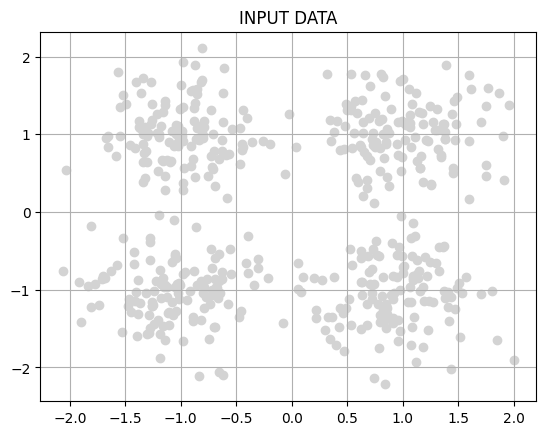

In [157]:
fig, ax = plt.subplots()

ax.scatter(
    x = x,
    y = y,
    c='lightgrey')
ax.grid(True)
ax.set_title('INPUT DATA')

plt.show()

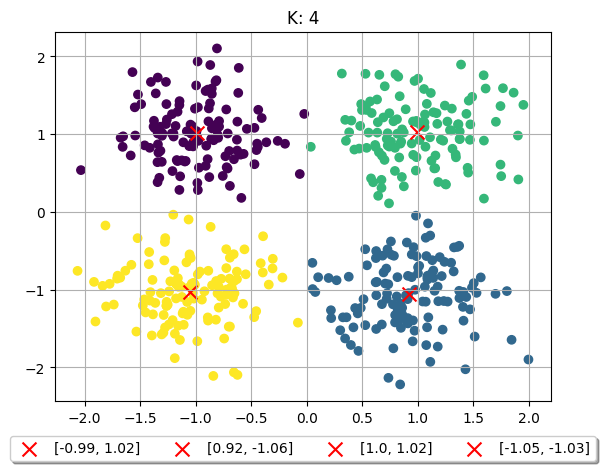

In [158]:
K = 4

#  define the number of clusters we want to break the input data into
kmeans = KMeans(n_clusters = K)
kmeans.fit(data)

labels = kmeans.predict(data)  # determines the cluster by measuring euclidean distance, identify and label clusters
centroids = kmeans.cluster_centers_  # cluster centers, centroids


# plot clustered data
fix2, ax2 = plt.subplots()

ax2.scatter(
    x, 
    y, 
    c=labels
    )


#  plot and label cluster centroids
for centroid_key in centroids:

    legend_label = [float(round(centroid, 2)) for centroid in centroid_key]

    ax2.scatter(
        centroid_key[0], 
        centroid_key[1], 
        label=legend_label,
        s=100, 
        marker='x', 
        c='red')

#  legend box
box = ax2.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.01,
                box.width, box.height * 1])

# Put a legend below current axis
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.075),
    fancybox=True, shadow=True, ncol=5)

ax2.set_title(f'K: {K}')
ax2.grid(True)

# plt.show()


Since we already determined that the optimal number of clusters is 4, we set that as the number of clusters (K=4).  Compare the clusters generated by scikit-learn with the clusters generated by the manually-written kmeans algorithm when K=4.  They're identical!